# Exploratory Analysis Airbnb 2021 - Boston

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

%matplotlib inline


In [2]:
pd.set_option('display.max_columns',None)

## Reading the files
---

In [3]:
listing = pd.read_csv("files/Bostonlistings.csv")
calendar = pd.read_csv("files/Bostoncalendar.csv")
reviews = pd.read_csv("files/Bostonreviews.csv")

Remove $ Symbols from price and adjusted prices

In [4]:
calendar.isna().sum()

listing_id          0
date                0
available           0
price               0
adjusted_price      0
minimum_nights    112
maximum_nights    112
dtype: int64

In [5]:
calendar['price'] = calendar['price'].str.replace(pat = '\$|,',repl = '',regex = True).astype(dtype = float)
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace(pat = '\$|,',repl = '', regex = True).astype(dtype = float)
calendar['available'] = calendar['available'] == 't'
calendar['date'] = pd.to_datetime(calendar['date'])

Reviews working

In [6]:
reviews.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     1
comments         74
dtype: int64

In [7]:
reviews['date'] = pd.to_datetime(reviews['date'])

listing works

In [8]:
listing.shape[0]

3146

In [9]:
Missing_values = pd.DataFrame(listing.isna().sum()[((listing.isna().sum())/listing.shape[0]).values > 0], columns=['Missing_Count'])
Missing_values.sort_values(by = 'Missing_Count', ascending=False).transpose()

,calendar_updated,bathrooms,neighbourhood_group_cleansed,license,host_about,neighborhood_overview,neighbourhood,review_scores_checkin,review_scores_accuracy,review_scores_location,review_scores_value,review_scores_cleanliness,review_scores_rating,review_scores_communication,last_review,first_review,reviews_per_month,host_response_rate,host_response_time,host_acceptance_rate,bedrooms,host_neighbourhood,beds,host_location,host_has_profile_pic,host_total_listings_count,host_listings_count,host_picture_url,host_thumbnail_url,host_is_superhost,host_since,host_name,host_identity_verified,description,bathrooms_text,maximum_nights_avg_ntm,minimum_nights_avg_ntm,maximum_maximum_nights,minimum_maximum_nights,maximum_minimum_nights,minimum_minimum_nights
Missing_Count,3146,3146,3146,1552,1145,1014,1014,1000,999,999,999,998,997,997,982,982,982,694,694,680,413,273,100,81,78,78,78,78,78,78,78,78,78,35,5,2,2,2,2,2,2


In [10]:
listing = listing.dropna(axis=1, how='all')

In [11]:
listing['last_scraped'] = pd.to_datetime(listing['last_scraped'])
listing['host_since'] = pd.to_datetime(listing['host_since'])
listing['calendar_last_scraped'] = pd.to_datetime(listing['calendar_last_scraped'])
listing['first_review'] = pd.to_datetime(listing['first_review'])
listing['last_review'] = pd.to_datetime(listing['last_review'])
listing['price'] = listing['price'].str.replace(pat = '\$|,',repl='',regex = True).astype(dtype = float)
listing['host_response_rate'] = listing['host_response_rate'].str.strip('%').astype(dtype = float)*(0.01)
listing['host_acceptance_rate'] = listing['host_acceptance_rate'].str.strip('%').astype(dtype = float)*(0.01)


In [12]:
for col in listing[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']].columns:
    i = []
    for value in listing[col]:
        if value == 't':
            i.append(True)
        elif value == 'f':
            i.append(False)
        else: i.append(value)
    listing[col] = i

In [13]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20210420194355,2021-04-21,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,1.00,0.41,False,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5.0,5.0,"['email', 'phone', 'reviews']",True,False,"Boston, Massachusetts, United States",East Boston,42.36413,-71.02991,Entire apartment,Entire home/apt,2,1 bath,1.0,0.0,"[""Washer"", ""Dishwasher"", ""Refrigerator"", ""Pati...",125.0,32,1125,32.0,32.0,1125.0,1125.0,32.0,1125.0,True,1,1,1,106,2021-04-21,19,3,0,2015-07-10,2021-02-26,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,False,1,1,0,0,0.27
1,6695,https://www.airbnb.com/rooms/6695,20210420194355,2021-04-21,$99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",NaN,NaN,NaN,True,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,4.0,4.0,"['email', 'phone', 'reviews', 'kba']",True,True,"Boston, Massachusetts, United States",Roxbury,42.32802,-71.09387,Entire condominium,Entire home/apt,4,1 bath,1.0,1.0,"[""Washer"", ""Dishwasher"", ""Fire extinguisher"", ...",169.0,29,730,29.0,29.0,730.0,730.0,29.0,730.0,True,8,19,40,40,2021-04-21,115,0,0,2009-08-06,2019-11-02,96.0,10.0,10.0,10.0,10.0,9.0,10.0,STR-404620,False,4,4,0,0,0.81
2,10813,https://www.airbnb.com/rooms/10813,20210420194355,2021-04-23,"Back Bay Apt-blocks to subway, Newbury St, The...",Stunning Back Bay furnished studio apartment. ...,Wander around this quintessential neighborhood...,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,US,NaN,within a few hours,0.97,0.17,False,https://a0.muscache.com/im/pictures/user/13444...,https://a0.muscache.com/im/pictures/user/13444...,Back Bay,15.0,15.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",True,True,"Boston, Massachusetts, United States",Back Bay,42.35061,-71.08787,Entire apartment,Entire home/apt,3,1 bath,NaN,1.0,"[""Wifi"", ""Kitchen"", ""Dishwasher"", ""Refrigerato...",96.0,29,1125,29.0,29.0,1125.0,1125.0,29.0,1125.0,True,29,59,63,307,2021-04-23,5,1,0,2016-05-23,2020-12-02,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,False,11,11,0,0,0.08
3,10986,https://ww

In [14]:
listing['host_is_superhost'].sum()

754

In [15]:
a = listing.groupby('host_id').agg({'host_total_listings_count': 'mean', 'host_is_superhost': 'first'})
a[a['host_total_listings_count'] > 0].groupby('host_is_superhost').agg({'host_total_listings_count': "mean"})

,host_total_listings_count
host_is_superhost,
False,15.165192
True,2.925150


<AxesSubplot:xlabel='Qty listings', ylabel='Qty host'>

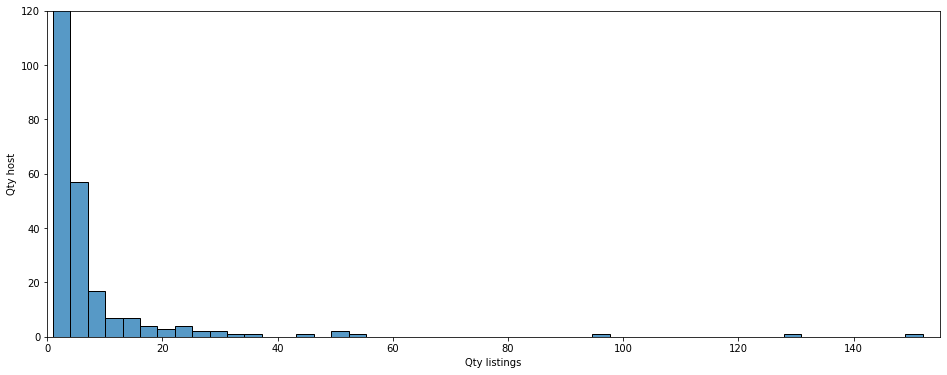

In [16]:
plt.figure(figsize=(16,6))
plt.ylim(0,120)
plt.xlim(0,155)
plt.ylabel('Qty host')
plt.xlabel('Qty listings')
sns.histplot(listing.groupby('host_id', dropna = False)['id'].count(), bins = 50)

<AxesSubplot:xlabel='Qty listings', ylabel='Qty host'>

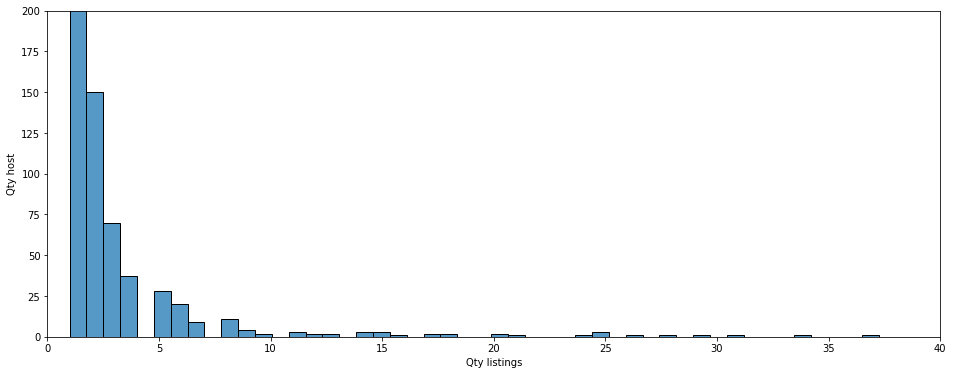

In [17]:
plt.figure(figsize=(16,6))
plt.ylim(0,200)
plt.xlim(0,40)
plt.ylabel('Qty host')
plt.xlabel('Qty listings')
sns.histplot(listing.groupby('host_id', dropna = False)['id'].count(), bins = 200)

## Comparar como o host preenche o quarto em relação com a comunicação dele

In [18]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,45987,2021-04-21,False,125.0,125.0,29.0,180.0
1,3781,2021-04-21,False,125.0,125.0,32.0,1125.0
2,3781,2021-04-22,False,125.0,125.0,32.0,1125.0
3,3781,2021-04-23,False,125.0,125.0,32.0,1125.0
4,3781,2021-04-24,False,125.0,125.0,32.0,1125.0


In [19]:
calendar[calendar['available'] != True].groupby('listing_id').agg({'adjusted_price' : ['mean', np.sum], 'price' : ['mean', np.sum], 'available':'count'})

adjusted_price                price          available
                     mean      sum        mean      sum     count
listing_id                                                       
3781           127.992278  33150.0  127.992278  33150.0       259
6695           169.000000  54925.0  169.000000  54925.0       325
10813           96.000000   5568.0   96.000000   5568.0        58
10986           96.000000   6912.0   96.000000   6912.0        72
13247           75.000000  27375.0   75.000000  27375.0       365
...                   ...      ...         ...      ...       ...
49271154       150.870175  42998.0  150.870175  42998.0       285
49283610       201.000000  15477.0  201.000000  15477.0        77
49291430        79.000000   5451.0   79.000000   5451.0        69
49294229        93.000000   6603.0   93.000000   6603.0        71
49306861       119.000000  38913.0  119.000000  38913.0       327

[2900 rows x 5 columns]

In [20]:
aggregated_list = calendar[calendar['available'] != True].groupby('listing_id').agg({'adjusted_price' : ['mean', np.sum], 'price' : ['mean', np.sum], 'available':'count'})
aggregated_list.columns = [col2 + '_' + col1 for col1, col2 in aggregated_list.columns]

In [21]:
right_listing =  listing[['id', 'host_id', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified']]
host_analysis =  aggregated_list.merge(right = right_listing, how = 'inner', left_index= True, right_on = 'id').sort_values('sum_adjusted_price', ascending=False)

In [22]:
host_analysis.shape

(2900, 15)

In [23]:
host_analysis.sort_values('count_available', ascending = False)

,mean_adjusted_price,sum_adjusted_price,mean_price,sum_price,count_available,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified
1254,249.000000,91134.0,249.000000,91134.0,366,24940427,188551199,2018-05-08,within an hour,0.75,1.00,False,"['email', 'phone', 'offline_government_id', 's...",True,True
542,55.000000,20130.0,55.000000,20130.0,366,12254831,36965419,2015-06-28,NaN,NaN,NaN,False,"['email', 'phone', 'jumio', 'offline_governmen...",True,True
297,200.000000,73200.0,200.000000,73200.0,366,6716872,27805870,2015-02-15,NaN,NaN,NaN,False,"['email', 'phone', 'reviews', 'kba']",True,True
1906,207.193989,75833.0,207.193989,75833.0,366,39004794,285344759,2019-08-13,within an hour,1.00,0.89,False,"['phone', 'offline_government_id', 'government...",True,True
419,57.103825,20900.0,57.103825,20900.0,366,8390793,44203099,2015-09-14,NaN,NaN,NaN,False,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,300.000000,300.0,300.000000,300.0,1,28635984,213613694,2018-09-04,NaN,NaN,NaN,False,"['email', 'phone', 'offline_government_id', 'g...",True,True
1235,105.000000,105.0,105.000000,105.0,1,24648787,36650837,2015-06-24,within a few hours,1.00,0.00,False,"['phone', 'reviews', 'jumio', 'offline_governm...",True,True
1243,300.000000,300.0,300.000000,300.0,1,24829523,79660976,2016-06-24,within an hour,1.00,0.75,False,"['email', 'phone', 'facebook', 'reviews', 'jum...",True,True
2643,350.000000,350.0,350.000000,350.0,1,46636328,9419684,2013-10-14,within a few hours,0.92,0.71,False,"['email', 'phone', 'manual_online', 'reviews',...",True,True


In [24]:
host_analysis =  host_analysis.groupby('host_id').agg({'mean_adjusted_price' : 'mean', 
                                                       'sum_adjusted_price': 'mean', 
                                                       'mean_price': 'mean', 
                                                       'sum_price': 'mean', 
                                                       'count_available':'mean', 
                                                       'host_since': 'first', 
                                                       'host_response_time': 'first', 
                                                       'host_response_rate': 'first', 
                                                       'host_acceptance_rate': 'first', 
                                                       'host_is_superhost': 'first', 
                                                       'host_verifications': 'first', 
                                                       'host_has_profile_pic' : 'first', 
                                                       'host_identity_verified': 'first',
                                                       'id': 'count'})


<AxesSubplot:xlabel='Qty listings', ylabel='Qty host'>

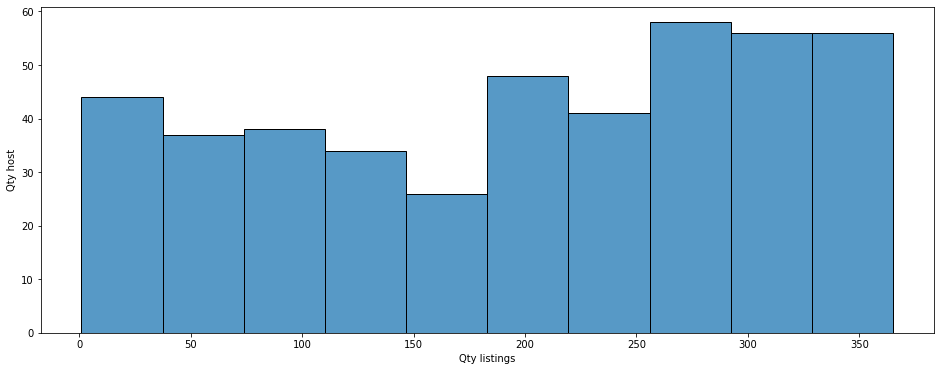

In [25]:
plt.figure(figsize=(16,6))
#plt.ylim(0,200)
#plt.xlim(0,40)
plt.ylabel('Qty host')
plt.xlabel('Qty listings')
sns.histplot(host_analysis[host_analysis['host_response_time'] == 'within an hour']['count_available'])

<AxesSubplot:xlabel='Qty listings', ylabel='Qty host'>

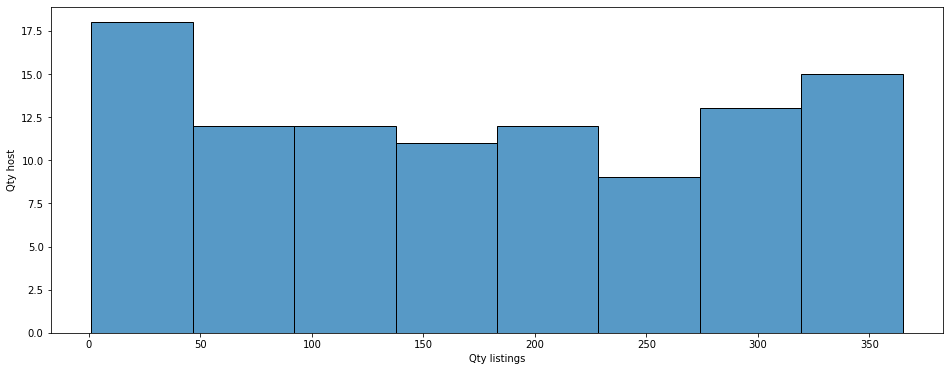

In [26]:
plt.figure(figsize=(16,6))
#plt.ylim(0,200)
#plt.xlim(0,40)
plt.ylabel('Qty host')
plt.xlabel('Qty listings')
sns.histplot(host_analysis[host_analysis['host_response_time'] == 'within a day']['count_available'])

<AxesSubplot:xlabel='Qty listings', ylabel='Qty host'>

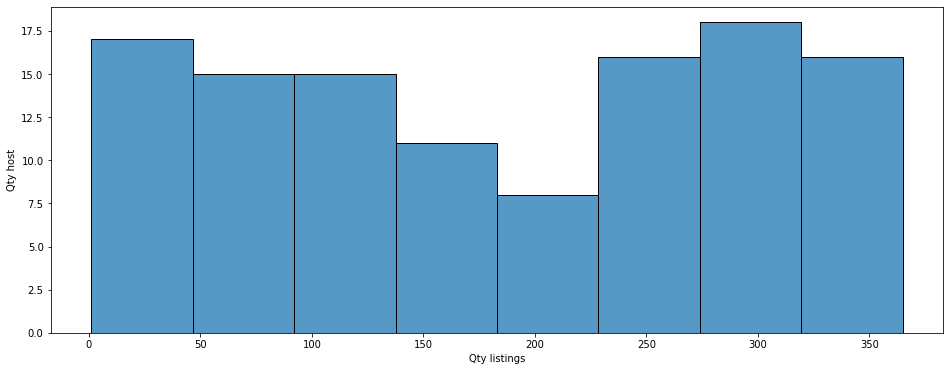

In [27]:
plt.figure(figsize=(16,6))
#plt.ylim(0,200)
#plt.xlim(0,40)
plt.ylabel('Qty host')
plt.xlabel('Qty listings')
sns.histplot(host_analysis[host_analysis['host_response_time'] == 'within a few hours']['count_available'])


<AxesSubplot:xlabel='Qty listings', ylabel='Qty host'>

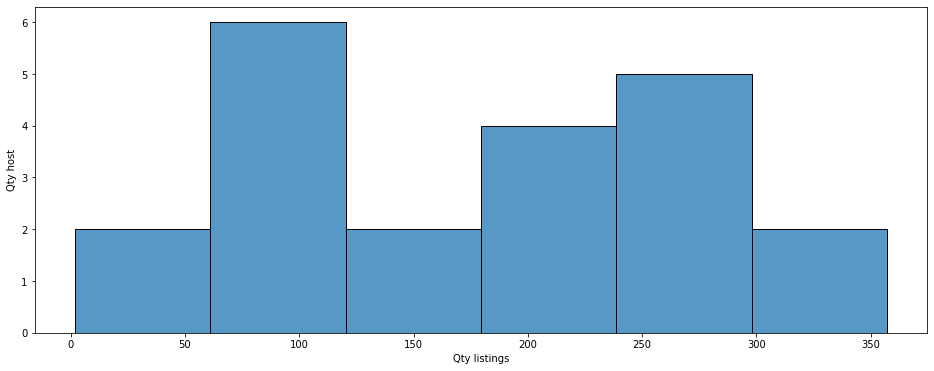

In [28]:
plt.figure(figsize=(16,6))
#plt.ylim(0,200)
#plt.xlim(0,40)
plt.ylabel('Qty host')
plt.xlabel('Qty listings')
sns.histplot(host_analysis[host_analysis['host_response_time'] == 'a few days or more']['count_available'])

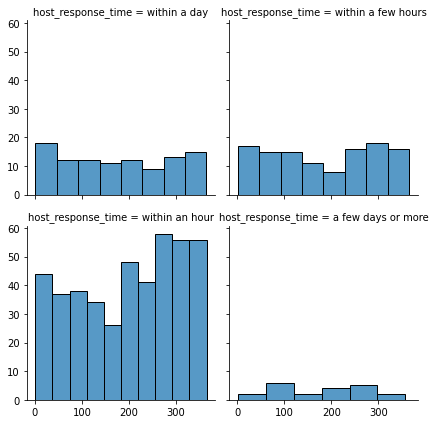

In [29]:
g = sns.FacetGrid(host_analysis, col="host_response_time",  col_wrap=2)
g.map_dataframe(sns.histplot, x="count_available")

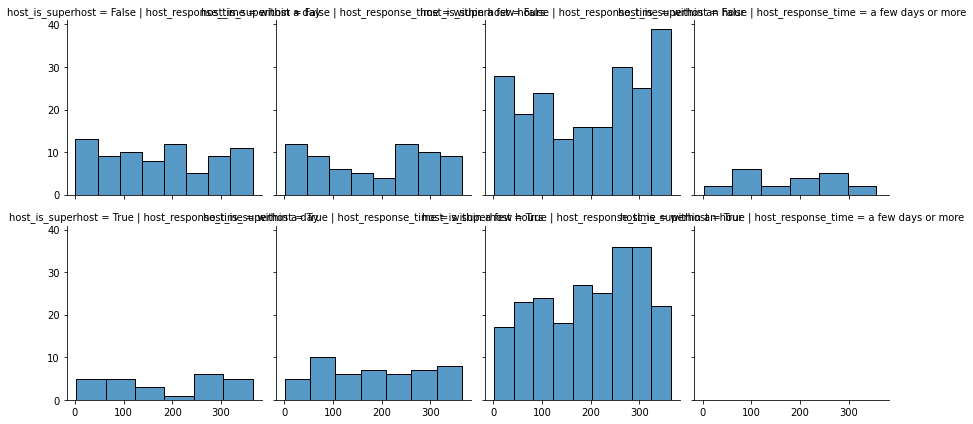

In [30]:
g = sns.FacetGrid(host_analysis, col='host_response_time',  row='host_is_superhost')
g.map_dataframe(sns.histplot, x="count_available")

In [31]:
host_analysis['host_response_time'].value_counts()

within an hour        438
within a few hours    116
within a day          102
a few days or more     21
Name: host_response_time, dtype: int64

<AxesSubplot:xlabel='host_since', ylabel='count_available'>

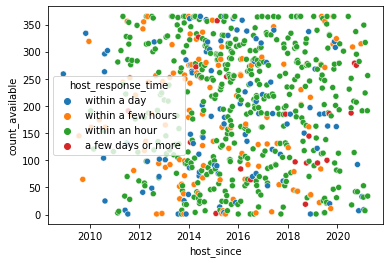

In [32]:
sns.scatterplot(data = host_analysis, x = "host_since", y = "count_available", hue = 'host_response_time')

In [33]:
host_analysis.sort_values('sum_adjusted_price', ascending=False).head(30)

,mean_adjusted_price,sum_adjusted_price,mean_price,sum_price,count_available,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,id
host_id,,,,,,,,,,,,,,
305274008,10000.000000,3.650000e+06,10000.000000,3.650000e+06,365.000000,2019-10-29,within a few hours,0.96,0.79,False,"['email', 'phone']",True,True,2
10850877,4907.183673,1.442712e+06,4907.183673,1.442712e+06,294.000000,2013-12-27,None,NaN,NaN,False,"['email', 'phone', 'reviews', 'kba']",True,True,1
261039449,5444.163585,6.052730e+05,5444.163585,6.052730e+05,112.000000,2019-05-10,within an hour,0.89,1.00,False,"['email', 'phone']",True,True,6
60638551,1700.000000,5.355000e+05,1700.000000,5.355000e+05,315.000000,2016-02-27,None,NaN,NaN,False,"['email', 'phone', 'reviews', 'offline_governm...",True,True,1
118162851,1426.358969,4.668100e+05,1426.358969,4.668100e+05,331.500000,2017-02-26,within an hour,1.00,1.00,True,"['email', 'phone', 'offline_government_id', 's...",True,True,2
27172259,1003.328767,3.662150e+05,1051.986301,3.839750e+05,365.000000,2015-02-03,None,NaN,NaN,True,"['email', 'phone', 'facebook', 'reviews', 'jum...",True,True,1
81492503,1066.666667,2.944000e+05,1066.666667,2.944000e+05,276.000000,2016-07-03,None,NaN,NaN,False,"['email', 'phone', 'reviews']",True,False,3
36496544,750.000000,2.737500e+05,750.000000,2.737500e+05,365.000000,2015-06-23,None,NaN,NaN,False,"['phone', 'facebook']",True,False,1
187675813,692.892857,2.522130e+05,692.892857,2.522130e+05,364.000000,2018-05-03,within a day,1.00,0.77,False,"['email', 'phone']",True,False,1


In [34]:
host_analysis[['sum_adjusted_price','mean_adjusted_price']]

,sum_adjusted_price,mean_adjusted_price
host_id,,
4804,33150.000000,127.992278
8229,58582.750000,179.319719
26988,15113.200000,102.075458
38997,5984.571429,94.297787
50024,33910.000000,101.526946
...,...,...
388391823,78585.000000,350.825893
388634902,28745.000000,90.678233
393194522,8609.800000,45.061458


In [35]:
(host_analysis['sum_adjusted_price']/host_analysis['mean_adjusted_price']).describe()

count    1146.000000
mean      235.091585
std       122.904354
min         1.000000
25%       131.000000
50%       271.500000
75%       365.000000
max       366.000000
dtype: float64

In [36]:
host_analysis['count_available'].describe()

count    1148.000000
mean      235.103065
std       122.777175
min         1.000000
25%       131.000000
50%       270.500000
75%       365.000000
max       366.000000
Name: count_available, dtype: float64